In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading csv

df=pd.read_csv('Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Dataframe contains 200 data points and 5 features 

Problem statement : We need to cluster the customers on the basis their Annual income and spending


Visualising Dendrogram

Dendogram is tree like structure(Hierarchi) which represent the merging of groups

It helps us to visualise how many clusters to take

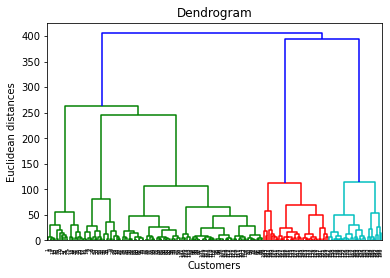

In [5]:
# Dendogram

import scipy.cluster.hierarchy as sch

cluster_visualising=sch.dendrogram(sch.linkage(df.iloc[:,[3,4]].values,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


If we observe the above dendrogram , it group the customers according to min eculidean distance

How to select no clusters from dendogram

We select largest vertical line which can not cut by horizontal line 

We can choose no of cluster is eqaul 5 from dendrogram

In [33]:
# AgglomerativeClustering Model initialization

from sklearn.cluster import AgglomerativeClustering

clustering_model=AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

clustering_model.fit(df.iloc[:,[3,4]].values)

AgglomerativeClustering(n_clusters=5)

In [34]:
# Predicting clusters
clustering_prediction=clustering_model.fit_predict(df.iloc[:,[3,4]])

In [35]:
clustering_prediction

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

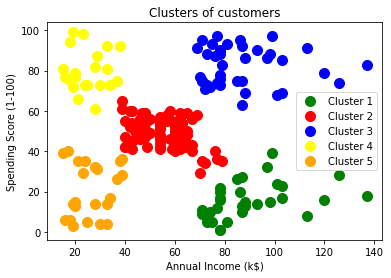

In [36]:
# Visualising clusters

plt.scatter(df.iloc[:,[3,4]].values[clustering_prediction == 0, 0], df.iloc[:,[3,4]].values[clustering_prediction == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(df.iloc[:,[3,4]].values[clustering_prediction == 1, 0], df.iloc[:,[3,4]].values[clustering_prediction == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(df.iloc[:,[3,4]].values[clustering_prediction == 2, 0], df.iloc[:,[3,4]].values[clustering_prediction == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(df.iloc[:,[3,4]].values[clustering_prediction == 3, 0], df.iloc[:,[3,4]].values[clustering_prediction == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(df.iloc[:,[3,4]].values[clustering_prediction == 4, 0], df.iloc[:,[3,4]].values[clustering_prediction == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

If we observe the above clustering graph there is no over lap between clusters and each clusters have certain distance from each other 

So our model doing well clustering

## Evaluation

In [37]:
from sklearn import metrics

In [38]:
metrics.silhouette_score(df.iloc[:,[3,4]].values, clustering_prediction , metric='euclidean')

0.5529945955148897

In [39]:
metrics.davies_bouldin_score(df.iloc[:,[3,4]].values, clustering_prediction )

0.5782207452369452

In [44]:
metrics.calinski_harabasz_score(df.iloc[:,[3,4]].values, clustering_prediction)

243.07142892964563